In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Grid for x:
xmin = -1.0
xmax = 1.0
N = 200
dx = (xmax - xmin) / N
x = np.linspace(xmin,xmax - dx, N) #For periodic BCs

In [3]:
# CFL and dt
v = -1
T = 0.5
CFL=0.9
dt = abs(CFL * dx / v)
nt = int(np.ceil(T / dt))
dt = T / nt
CFL = abs(dt * v / dx)

In [4]:
#Parameters and iniatial condition:
x0 = 0.0
sigma = 0.2
u_init = np.exp(-(x-x0)**2 / sigma**2)

In [5]:
# analytic at time T
def analytic(x, t):
    return np.exp(- (x - x0 - v*t)**2 / sigma**2)

In [6]:
def upwind(u, v, dt, dx, T):
    alpha = v * dt / dx
    N = len(u)
    nt = int(np.ceil(T / dt))

    u = u.copy()   
    for n in range(nt):
        u_new = np.zeros_like(u)

        if v > 0:
            for j in range(1,N-1):
                u_new[j] = u[j] - alpha * (u[j] - u[j-1])

        else:
            for j in range(1,N-1):
                u_new[j] = u[j] - alpha * (u[j+1] - u[j])
                        
        u_new[0] = u_new[N-2]
        u_new[N-1] = u_new[1]
        u = u_new  # update

    return u

In [7]:
u_upwind = upwind(u_init, v, dt, dx,T)
u_exact  = analytic(x, T)

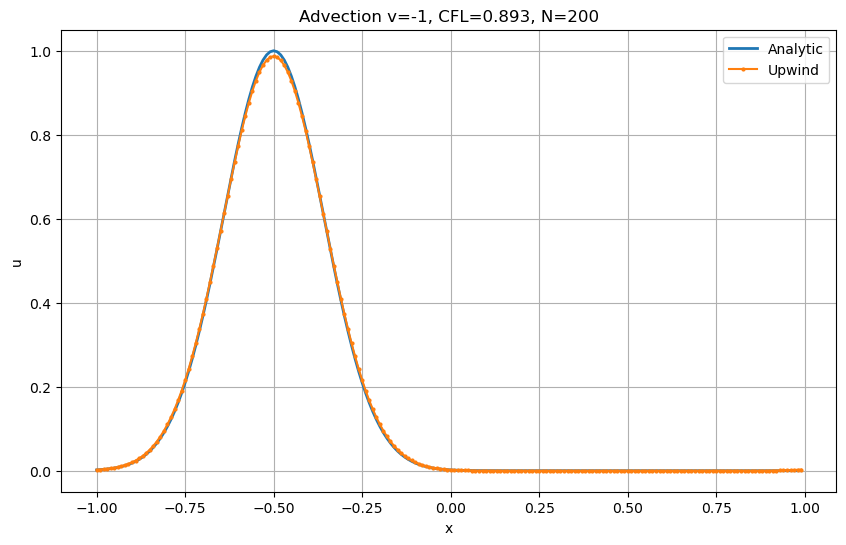

In [8]:
# ---------- plots ----------
plt.figure(figsize=(10,6))
plt.plot(x, u_exact, label='Analytic', linewidth=2)
plt.plot(x, u_upwind, '.-', label='Upwind', markersize=4)
plt.legend()
plt.title(f"Advection v={v}, CFL={CFL:.3f}, N={N}")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.show()

In [9]:
def ftcs(u, v, dx, dt, T):
    alpha = v * dt / dx
    N = len(u)
    nt = int(np.ceil(T / dt))
    u = u.copy()

    for n in range(nt):
        u_new = np.zeros_like(u)
        for j in range(1,N-1):
            u_new[j] = u[j] - 0.5 * alpha * (u[j+1] - u[j-1])  
        
        u_new[0]=u_new[N-2]
        u_new[N-1]=u_new[1]
        u = u_new
    return u

In [10]:
u_ftcs = ftcs(u_init,v,dx,dt,T)
u_exact  = analytic(x, T)

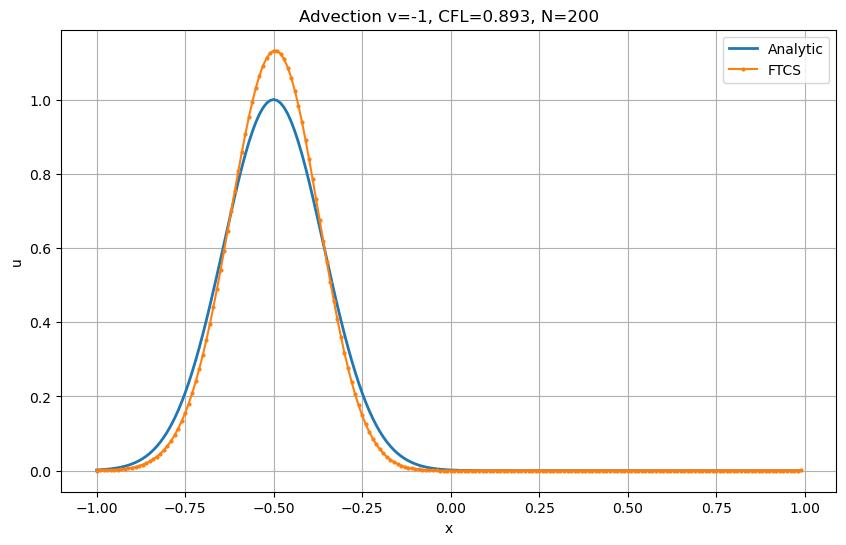

In [11]:
# ---------- plots ----------
plt.figure(figsize=(10,6))
plt.plot(x, u_exact, label='Analytic', linewidth=2)
plt.plot(x, u_ftcs, '.-', label='FTCS', markersize=4)
plt.legend()
plt.title(f"Advection v={v}, CFL={CFL:.3f}, N={N}")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.show()

In [12]:
#Lax-Friedrichs:
def lax_fried(u,v,dx,dt,T):
    alpha = v * dt / dx
    N = len(u)
    nt = int(np.ceil(T/dt))
    u = u.copy()

    for n in range(nt):
        u_new = np.zeros_like(u)

        for j in range(1,N-1):
            u_new[j]= 0.5 * (u[j+1]+u[j-1]) - 0.5 * alpha * (u[j+1]-u[j-1])
        
        u_new[0]=u_new[N-2]
        u_new[N-1]=u_new[1]
        u = u_new
    return u

In [13]:
u_lax_fried = lax_fried(u_init,v,dx,dt,T)

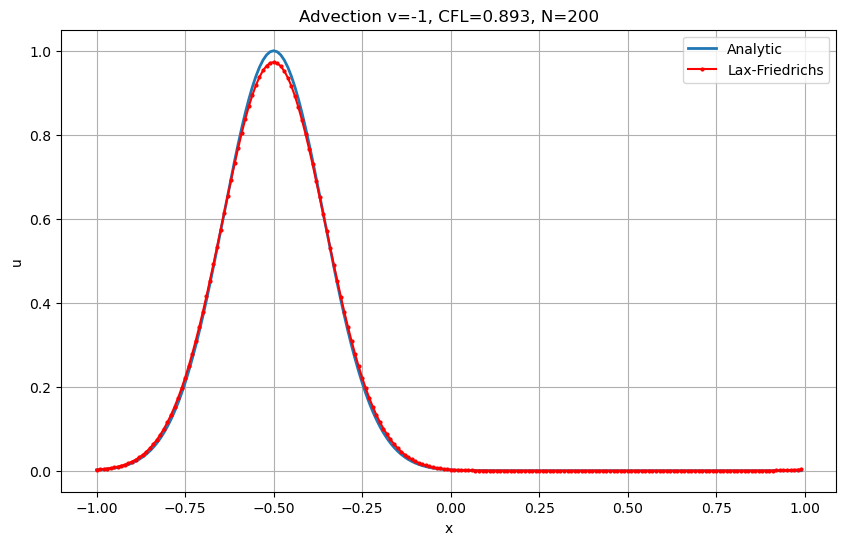

In [14]:
# ---------- plots ----------
plt.figure(figsize=(10,6))
plt.plot(x, u_exact, label='Analytic', linewidth=2)
plt.plot(x, u_lax_fried, '.-',color='red', label='Lax-Friedrichs', markersize=4)
plt.legend()
plt.title(f"Advection v={v}, CFL={CFL:.3f}, N={N}")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.show()